# The Iris Dataset



## Introduction

Originally introduced by biologist and statitician Ronald Fisher in 1936 at UCI Machine Learning Repository, this dataset is largely considered to be the Hello World of machine learning datasets. It is very popular in the field of teaching and is often used to introduce people to machine learning and visualization of datasets.

In 1936 botanist Edgar Anderson was studying the structural variation of three related species of Iris flowers. He collected 50 samples from each species making up 150 total. For each sample he measured the sepal and petal length and width.

The three species of Iris flower collected were the _Iris setosa, Iris virginica and Iris versicolor_.

![image of an Iris flower depicting the petal and sepal length, width](./images/iris_petal_sepal.png)


**The data set contains:**

* 3 classes of 50 instances each (the class denoting the species of Iris)
* Measurements of the sepal and petal, length and width in centimetres for every sample

In this notebook I will do my best to explain the dataset itself and show/discuss how to write a supervised learning algorithm to separate the three classes of iris based on the their characteristics. 

The question that we want to answer is _"Can we predict the species of Iris flower using only measurements?_

# Inspecting the Dataset

Our first step is to load and inspect the dataset so we can gain a greater understanding about the layout and additionally to confirm everything above is true.

Let's import the dataset as a Panda dataframe and look at all 150 entries.

In [1]:
# Import pandas for data processing
import pandas as pd

# Load the dataset
irisDataset = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# Display the 150 entries
irisDataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
print(irisDataset.shape)

(150, 5)


- - -

Each row represents the sample and each column represents the features. The first four columns list the sepal and petal length and width in centimentres while the fifth column identifies the species.

Sometimes you will see the rows and columns reffered to under different names, these are listed below for your utility:

* A row is an observation, sample, example, instance, record
* A column is a feature, predictor, attribute, independent variable, input, regressor, covariate

- - - 

To verify that we do indeed have 50 samples of each species let's check that with a simple pandas function.

In [3]:
irisDataset['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Additionally let's check their types so we know what we will be handling.

In [4]:
# Check data type of each of the columns
irisDataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- - -

We can also see if there is any other information we need to know about with the `info` function.

In [5]:
print(irisDataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


- - -

Let's create a summary of each attribute of the dataset with the `describe` function. This way we can view the central tendency, dispersion and shape of a dataset’s distribution.

In [6]:
irisDataset.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- - - 

Two minor functions to note but they still have great utility, are `head` and `tail`. These provide us with the ability to eyeball the dataset. 

In [7]:
print(irisDataset.head(20))

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [8]:
print(irisDataset.tail(20))

     sepal_length  sepal_width  petal_length  petal_width    species
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2    

- - - 

The `sample` function chooses n number of random samples from the dataset and displays them.

In [9]:
irisDataset.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
43,5.0,3.5,1.6,0.6,setosa
103,6.3,2.9,5.6,1.8,virginica
133,6.3,2.8,5.1,1.5,virginica
31,5.4,3.4,1.5,0.4,setosa
22,4.6,3.6,1.0,0.2,setosa
84,5.4,3.0,4.5,1.5,versicolor
105,7.6,3.0,6.6,2.1,virginica
68,6.2,2.2,4.5,1.5,versicolor
149,5.9,3.0,5.1,1.8,virginica
19,5.1,3.8,1.5,0.3,setosa


Lastly, let's check if there are any null values in the dataset. There are none.

In [10]:
irisDataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualizing the Dataset

Now that we've inspected the dataset, I think visualizing it will provide an extra level of clarity. I believe that seeing the distributions helps identify non-obvious trends in data that is provided without visual aid.

We need to import some packages to help us with this:

* Seaborn: A Python data visualization library based on matplotlib. 

* Matplotlib: A Python 2D plotting library 

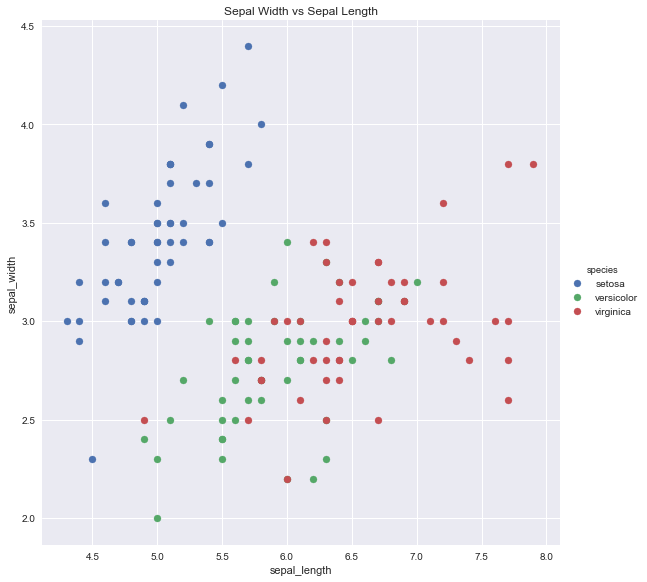

In [90]:
# Data Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', color_codes=True)

%matplotlib inline
# Plot a coloured scatter plot 
sns.FacetGrid(irisDataset, hue = 'species', size=8) \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend()
plt.title("Sepal Width vs Sepal Length")
plt.show()

Let's take another look back at `irisDataset.describe()`

It should be easier to see now that, for example, when it comes to sepal width the majority of the values are in and around 3 - 3.3

In [64]:
irisDataset.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- - -

The pairplot is very useful as it shows the bivariate relation between each pair of features

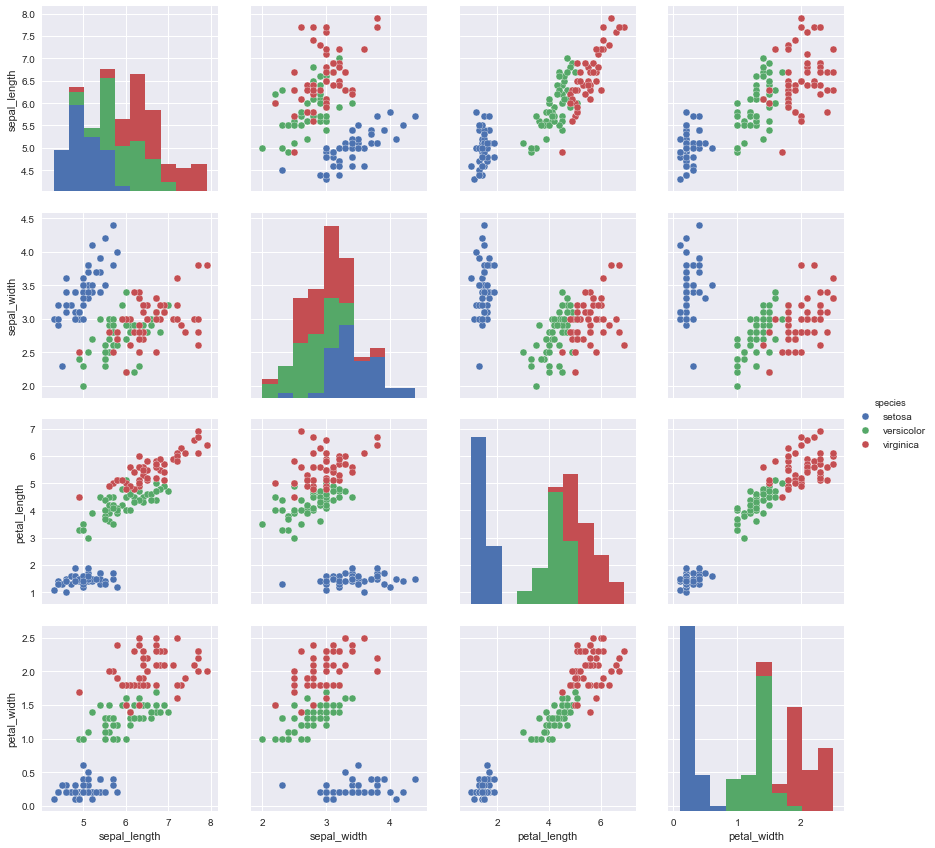

In [98]:
# Set the default Seaborn theme
sns.set()
sns.pairplot(data = irisDataset, hue='species', size=3)
plt.show()

Something to take away from these distributions is how the values for _virginica_ and _versicolor_ are more similarily aligned than that of _setosa_ 

Let's visualize this further with the use of another multivariate visualization technique pandas has known as parallel_coordinates, again we see the trend clearly where _setosa_ typically has a shorter petal length and the petal width of the other two species generally appears to be longer.


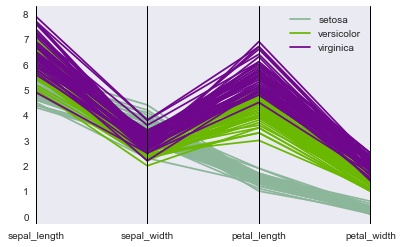

In [114]:
# Parallel coordinates plot each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(irisDataset, "species")
plt.show()

## References

https://www.ritchieng.com/machine-learning-iris-dataset/

https://www.youtube.com/watch?v=hd1W4CyPX58

https://www.kaggle.com/adityabhat24/iris-data-analysis-and-machine-learning-python

https://seaborn.pydata.org/introduction.html?highlight=iris